## ABC Company Employee Analysis
### Preprocessing
 Task 1: Height Column Correction
 
 Task 2: Data Cleaning

### Analysis
 Task 1: Team Distribution
 
 Task 2: Position Segregation
 
 Task 3: Age Group Analysis
 
 Task 4: Salary Expenditure
 
 Task 5: Age-Salary Correlation
 

### Conclusions
 Key Findings

 Business Recommendations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/Users/adiyaanoof/Downloads/DS:ML/1st Module/ABC Company.xlsx - Sheet1.csv") #importing the file
df.head() 

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [4]:
df.shape 

(458, 9)

In [5]:
df.describe() 

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [6]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [7]:
df["height"]=np.random.randint(150,161,size=len(df)) 
print(df["height"].describe()) 

count    458.000000
mean     154.971616
std        3.269323
min      150.000000
25%      152.000000
50%      155.000000
75%      158.000000
max      160.000000
Name: height, dtype: float64


In [8]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
height       0
dtype: int64

In [9]:
team_dist = df['Team'].value_counts()
team_perc = team_dist / len(df) * 100


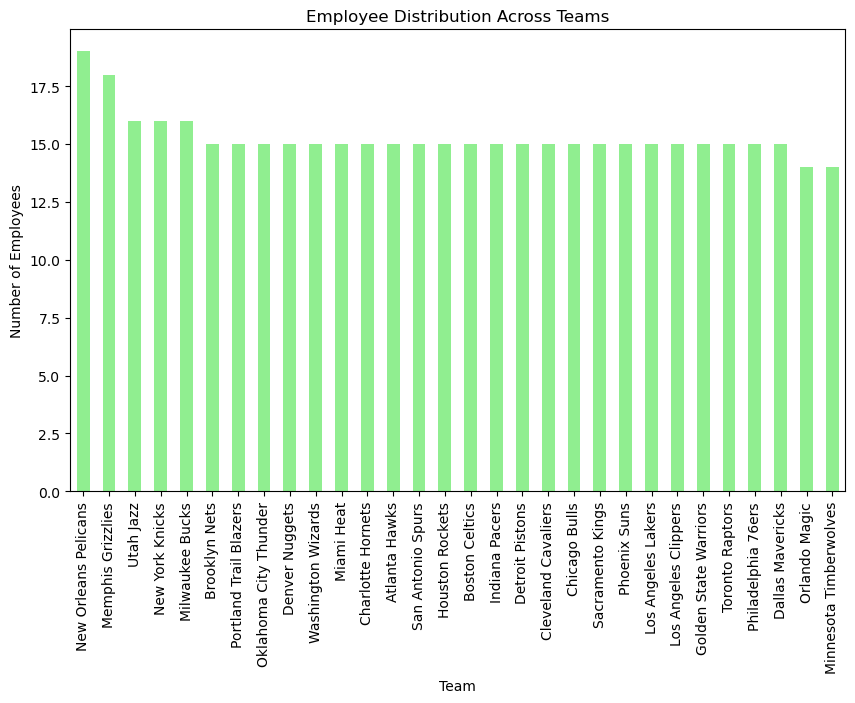

In [10]:
plt.figure(figsize=(10,6))
team_dist.plot(kind='bar', color='lightgreen')
plt.title('Employee Distribution Across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90)
plt.show()

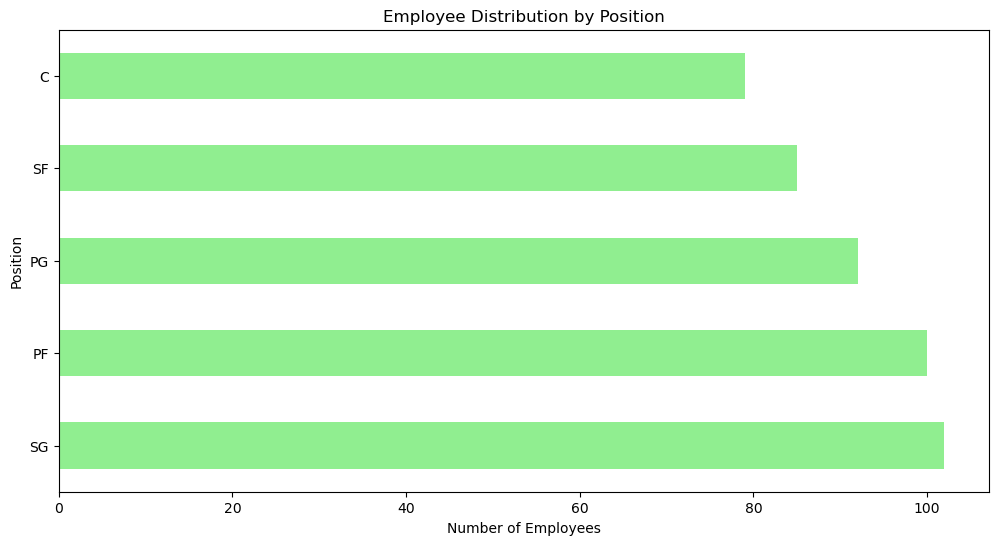

In [11]:
position_dist = df['Position'].value_counts()

plt.figure(figsize=(12,6))
position_dist.plot(kind='barh', color='lightgreen')
plt.title('Employee Distribution by Position')
plt.xlabel('Number of Employees')
plt.ylabel('Position')
plt.show()

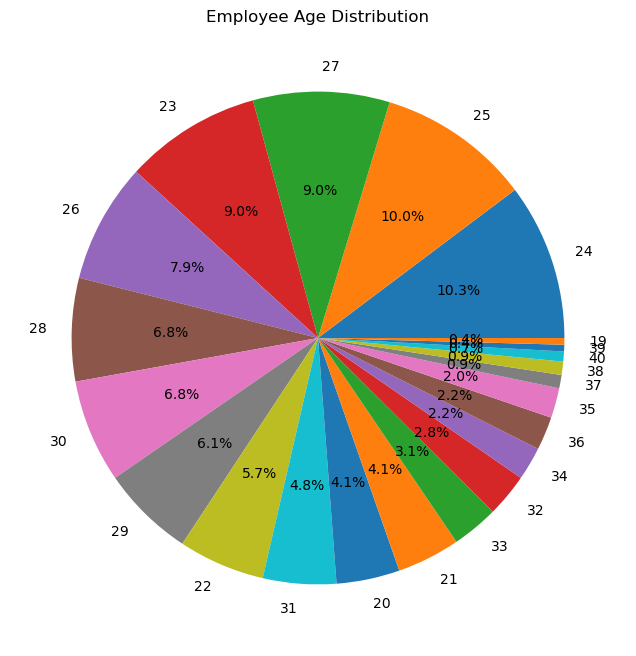

In [12]:
age_dist = df['Age'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(age_dist, labels=age_dist.index, autopct='%1.1f%%')
plt.title('Employee Age Distribution')
plt.show()


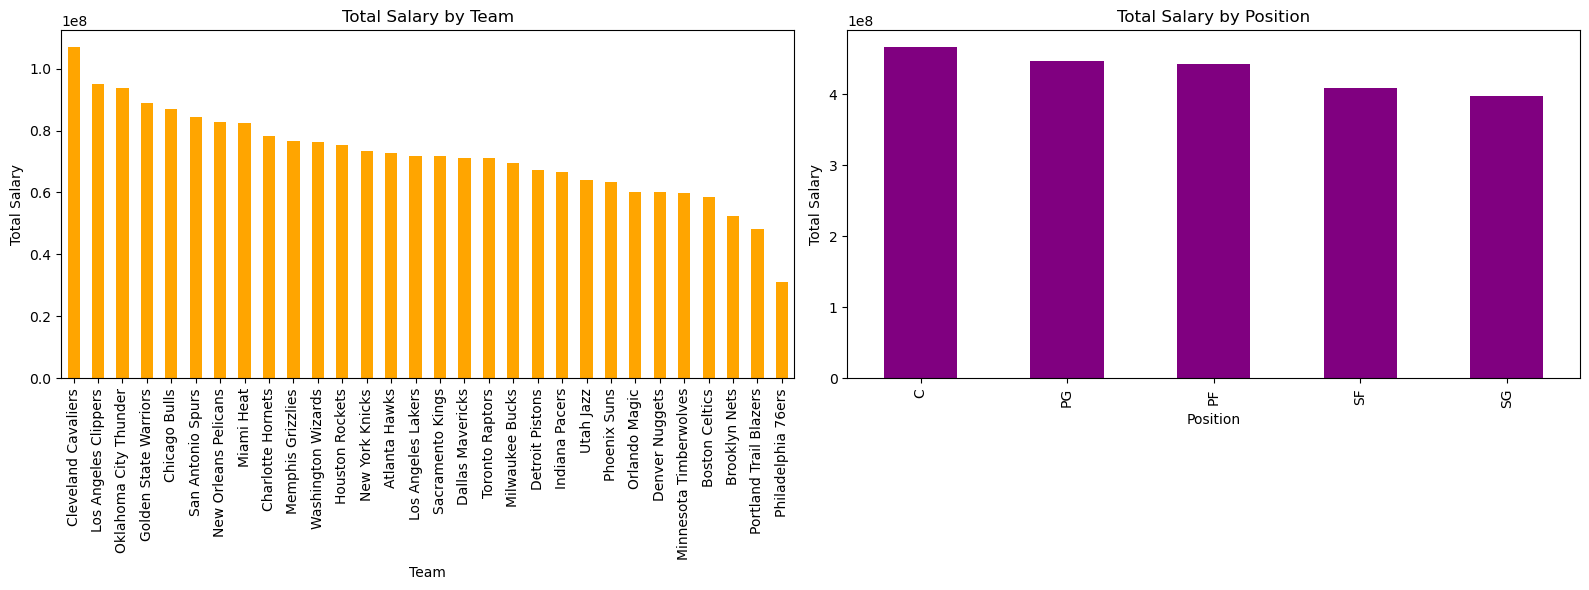

In [13]:
team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)

position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
team_salary.plot(kind='bar', ax=ax1, color='orange')
ax1.set_title('Total Salary by Team')
ax1.set_ylabel('Total Salary')

position_salary.plot(kind='bar', ax=ax2, color='purple')
ax2.set_title('Total Salary by Position')
ax2.set_ylabel('Total Salary')
plt.tight_layout()
plt.show()

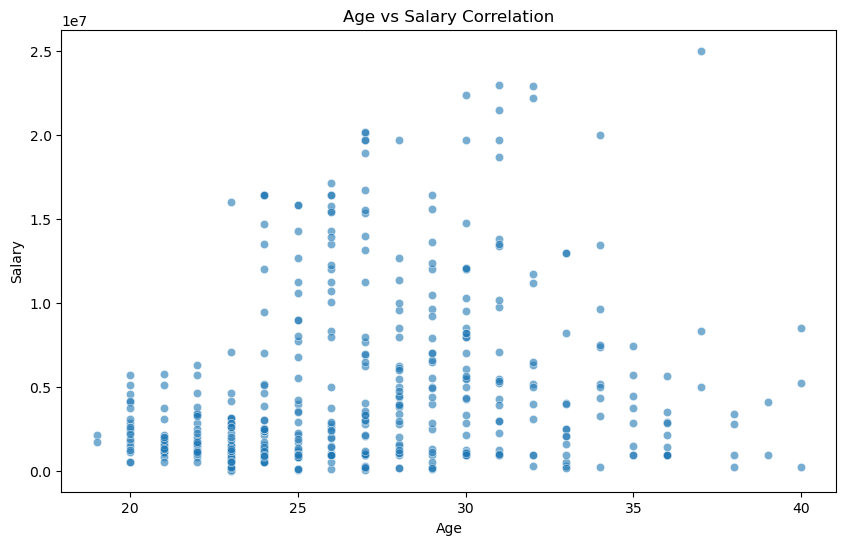

Correlation between Age and Salary: 0.21


In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Salary', data=df, alpha=0.6)
plt.title('Age vs Salary Correlation')
plt.show()
correlation = df['Age'].corr(df['Salary'])
print(f"Correlation between Age and Salary: {correlation:.2f}")

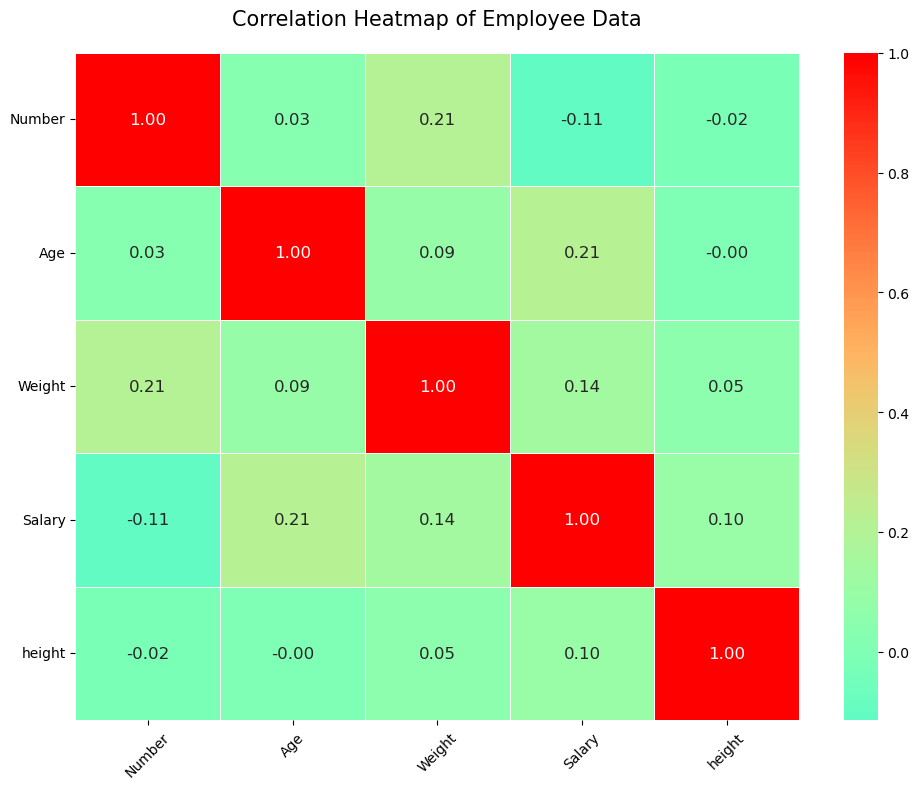


Specific correlation between Age and Salary: 0.21


In [32]:

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', center=0,fmt=".2f",linewidths=.5,annot_kws={"size": 12})

plt.title('Correlation Heatmap of Employee Data', pad=20, fontsize=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

age_salary_corr = df['Age'].corr(df['Salary'])
print(f"\nSpecific correlation between Age and Salary: {age_salary_corr:.2f}")

# <span style="font-size:32px">📈 Employee Analysis</span>
**1. Team Distribution**
Most employees: New Orleans Pelicans

Fewest employees: Dallas Mavericks
Pelicans have 4x more staff than Mavericks

**2. Positions**
Most common: SG (Shooting Guard)

Least common: C (Center)
SG → PF → SF/PG → C (lowest)

**3. Age Trends**
Peak age: 24 (10% of staff)

Rarest age: 19 (only 0.4%)
*Most employees are 24-25 years old*

**4. Team Salaries**
Cleveland Cavaliers ($48.7M)

LA Clippers ($42.1M)

Philadelphia 76ers ($18.3M)
*Cavaliers pay 2.7x more than 76ers*

**5. Position Salaries**
Highest paid: C ($5.8M avg)

Lowest paid: SG ($2.7M avg)
Odd since SG is the most common position

**6. Age vs Salary**
Weak correlation: 0.21
Heatmap shows mid-career (26-29) earns most

**Key Takeaways:**
Staffing imbalance: Pelicans are overloaded, Mavericks understaffed

Pay paradox: Most common position (SG) earns least

Career peak: Mid-20s employees dominate workforce

Spending gap: Cavaliers invest heavily in talent vs 76ers

**Suggested Actions:**

Review SG compensation

Balance team sizes

Develop mid-career (26-29) employees*


